In [5]:
#a. Preprocessing 
 

import pandas as p 
da=p.read_csv("crop_pre.csv") 
da.info() 
 
#PRE_PROCESSING 
miss=da.isna().sum() 
print("\nMissing Values:\n",miss) 
da.dropna(inplace=True) 
print("\nMissing Values:\n",da.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB

Missing Values:
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

Missing Values:
 State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


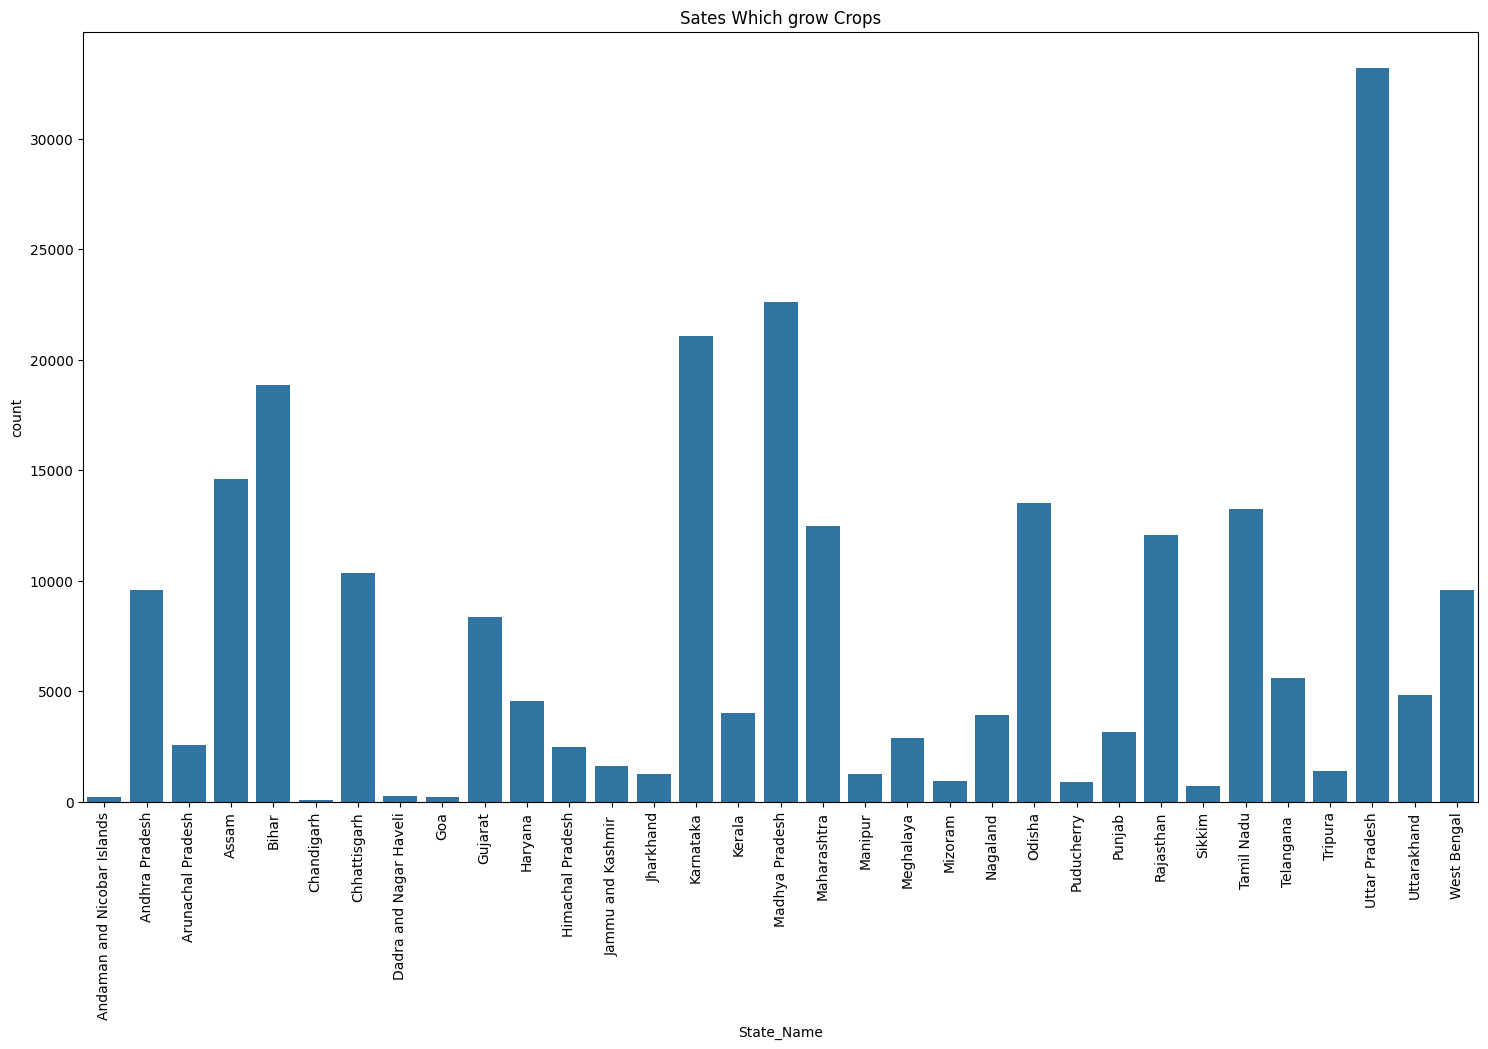

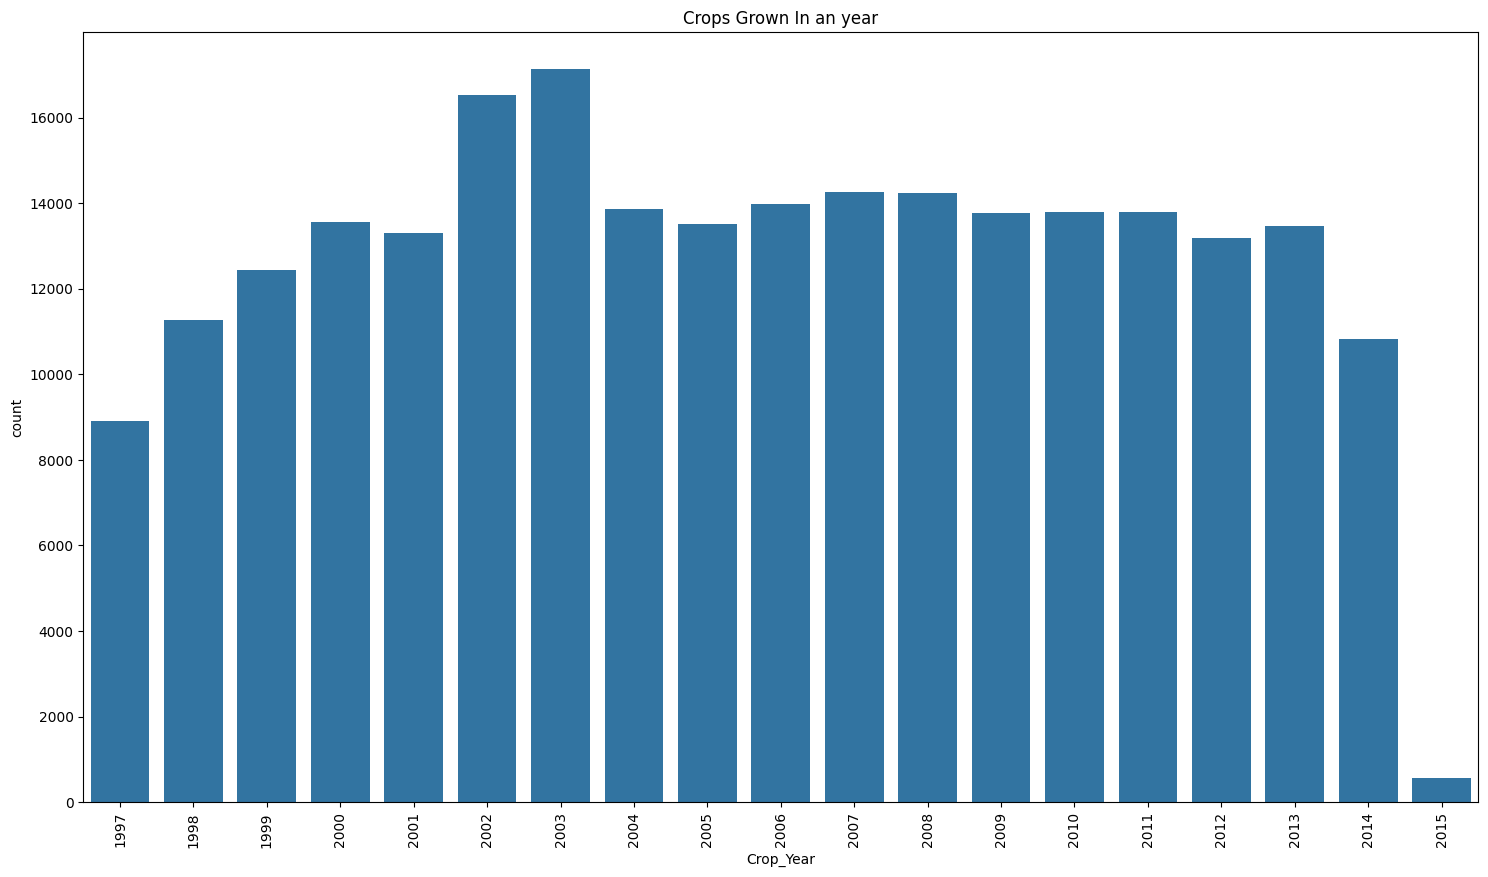

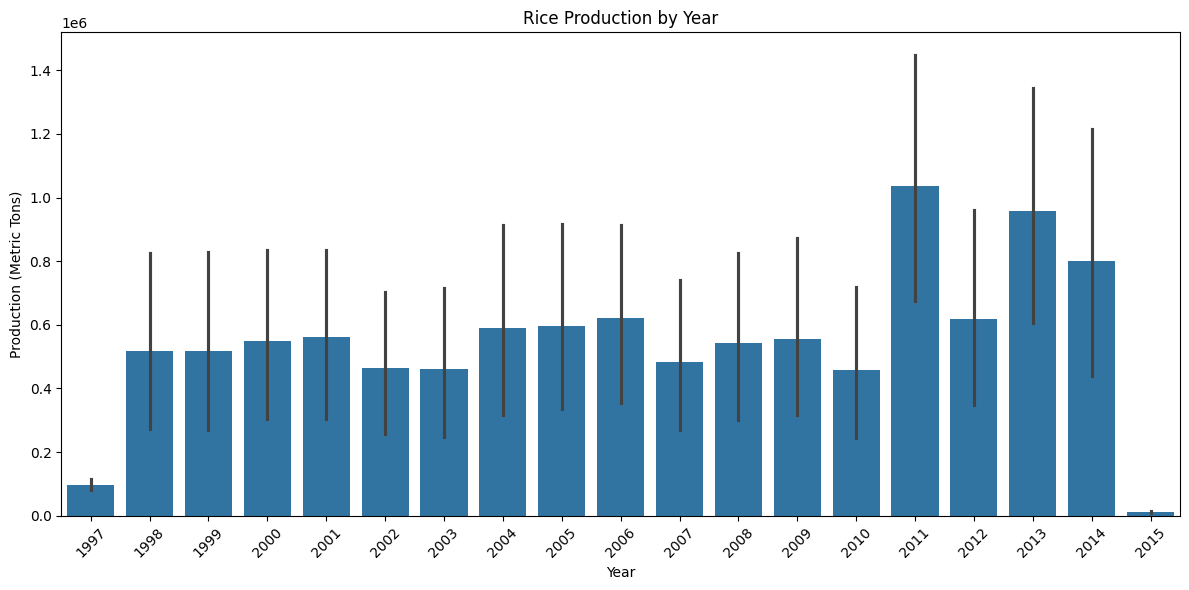

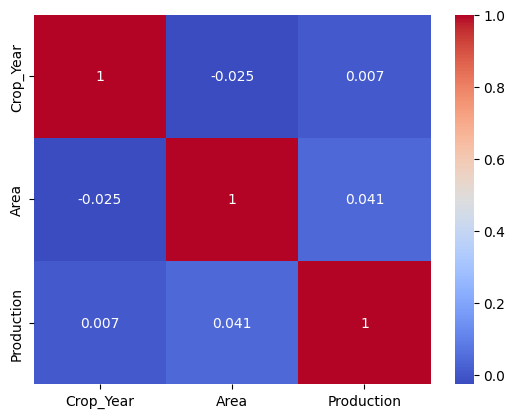

In [11]:
#b. Data Exploration 
 

 
import matplotlib.pyplot as m 
import seaborn as s 
 
m.figure(figsize=(18,10)) 
s.countplot(data=da, x='State_Name') 
m.title("Sates Which grow Crops") 
m.xticks(rotation=90) 
m.show() 

m.figure(figsize=(18,10)) 
s.countplot(data=da,x='Crop_Year') 
m.title('Crops Grown In an year') 
m.xticks(rotation=90) 
m.show() 
 
m.figure(figsize=(12, 6)) 
s.barplot(x=da['Crop_Year'], y=da['Production'],data=da) 
m.title('Rice Production by Year') 
m.xlabel('Year') 
m.ylabel('Production (Metric Tons)') 
m.xticks(rotation=45) 
m.tight_layout() 
m.show() 
 
sn=da.select_dtypes(exclude=['object']) 
s.heatmap(data=sn.corr(),annot=True,cmap='coolwarm') 
m.show()

In [9]:
#c. Splitting 
  
 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
 
#Transformation 
categorical_columns = ['State_Name','District_Name','Season','Crop'] 
label_encoders = {} 
 
for column in categorical_columns: 
    label_encoders[column] = LabelEncoder() 
    da[column] = label_encoders[column].fit_transform(da[column]) 
 
X = da.drop('Production', axis=1)   
y = da['Production'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
print("Train set:", X_train.shape, y_train.shape) 
print("Test set:", X_test.shape, y_test.shape)

Train set: (169652, 6) (169652,)
Test set: (72709, 6) (72709,)
